<a href="https://colab.research.google.com/github/Seema1004/Assignment/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#initialize the libraries
!pip install scikit-learn

!pip install lazypredict #AutoAI generator

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.io import arff

from sklearn.metrics import precision_score, recall_score, f1_score #import the missing functions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.7/733.7 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 12.4 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("AirTravelSatisfaction_SPR25.csv")

In [ ]:
# Basic preprocessing
df['Experience'] = df['satisfaction'].apply(lambda x: 'Satisfied' if x == 'satisfied' else 'Not Satisfied')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_clean = df[np.isfinite(df['Age']) & df['Experience'].isin(['Satisfied', 'Not Satisfied'])]

In [ ]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'InflightWifiService', 'ArrivalDelay',
       'Frequent Flyer Miles', 'Travel Purpose Detail', 'Experience'],
      dtype='object')

In [ ]:
df.info()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4999 non-null   int64  
 1   Gender                             4999 non-null   object 
 2   Customer Type                      4999 non-null   object 
 3   Age                                4999 non-null   int64  
 4   Type of Travel                     4999 non-null   object 
 5   Class                              4999 non-null   object 
 6   Flight Distance                    4999 non-null   int64  
 7   Inflight wifi service              4999 non-null   int64  
 8   Departure/Arrival time convenient  4999 non-null   int64  
 9   Ease of Online booking             4750 non-null   float64
 10  Gate location                      4999 non-null   int64  
 11  Food and drink                     4999 non-null   int64

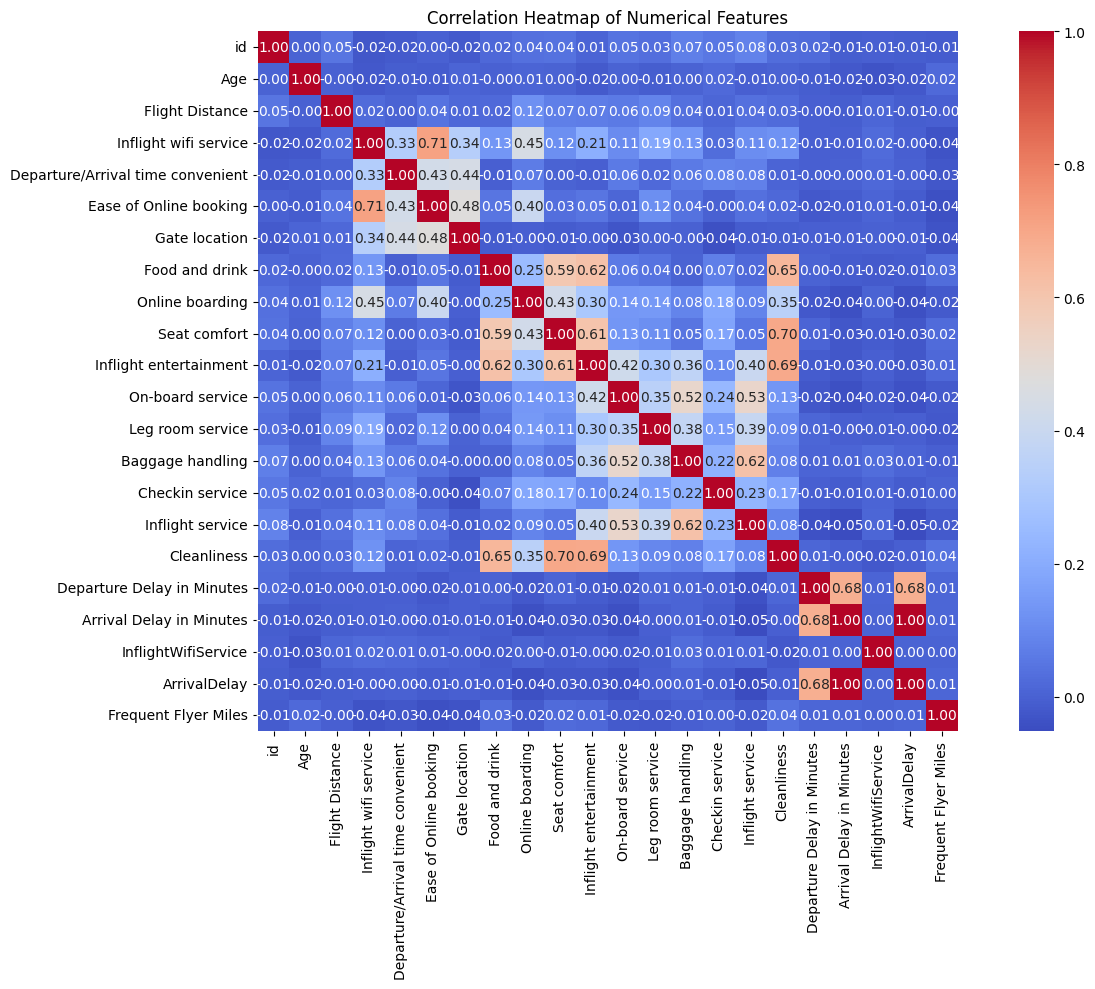

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(14, 10))
numerical_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

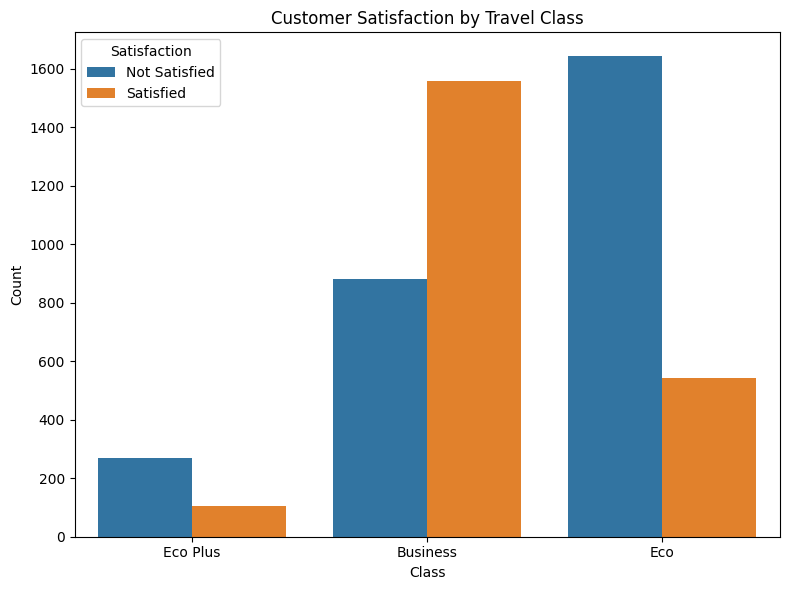

In [ ]:
# 2. Satisfaction by Travel Class
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class', hue='Experience')
plt.title("Customer Satisfaction by Travel Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()

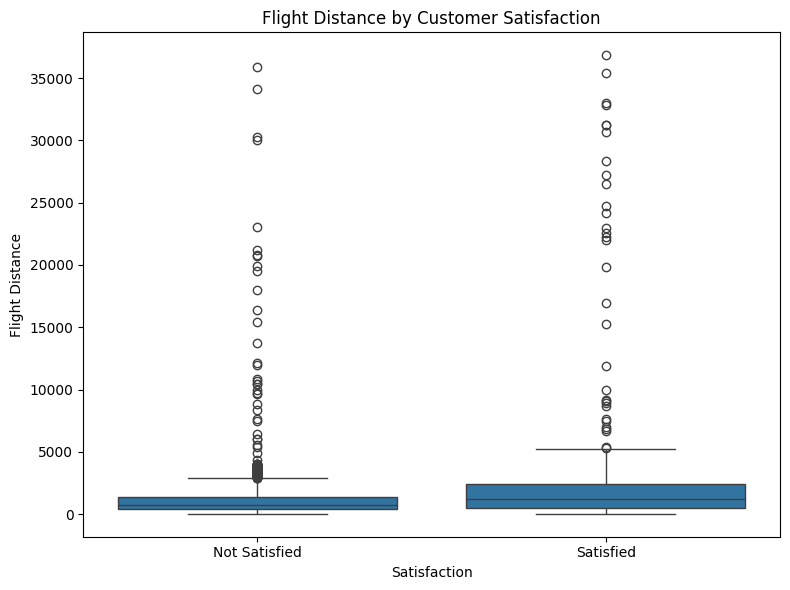

In [ ]:
# 3. Flight Distance vs Satisfaction (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Experience', y='Flight Distance')
plt.title("Flight Distance by Customer Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Flight Distance")
plt.tight_layout()
plt.show()

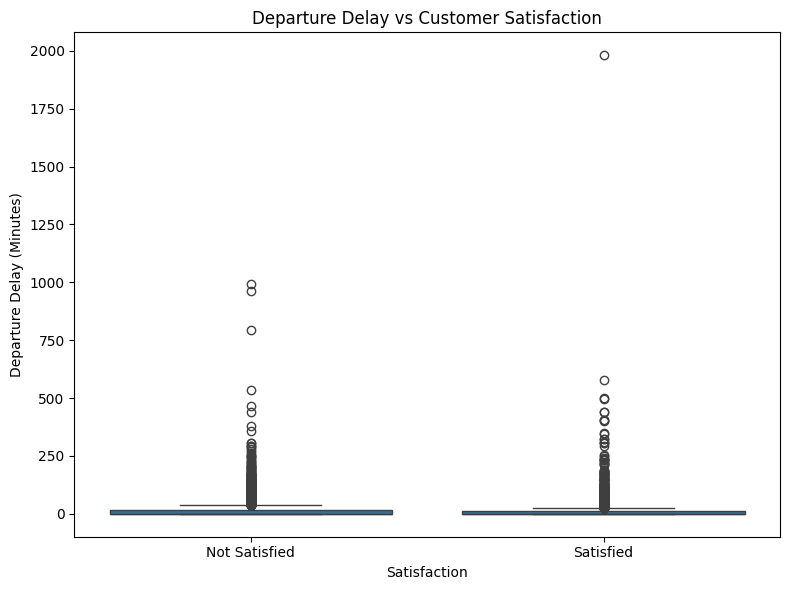

In [ ]:

# 4. Departure Delay vs Satisfaction (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Experience', y='Departure Delay in Minutes')
plt.title("Departure Delay vs Customer Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Departure Delay (Minutes)")
plt.tight_layout()
plt.show()

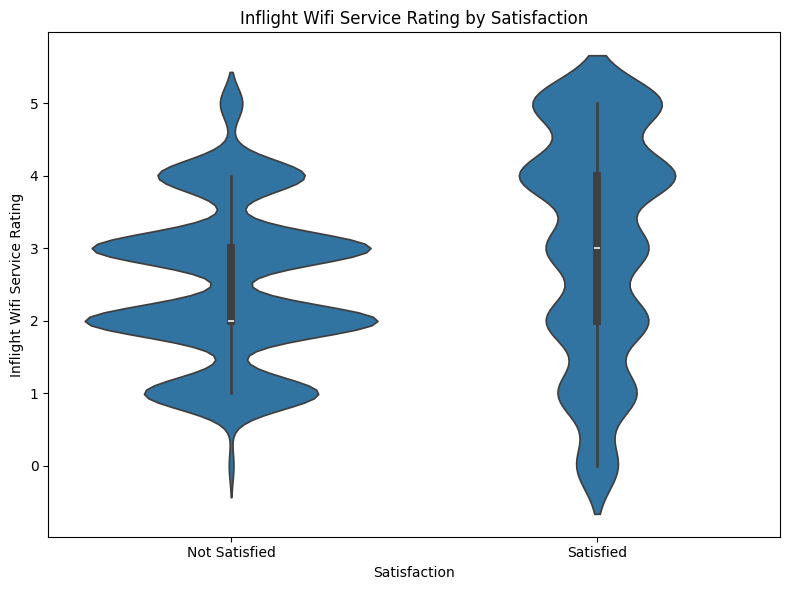

In [ ]:
# 5. Inflight Wi-Fi Rating by Satisfaction (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Experience', y='Inflight wifi service')
plt.title("Inflight Wifi Service Rating by Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Inflight Wifi Service Rating")
plt.tight_layout()
plt.show()

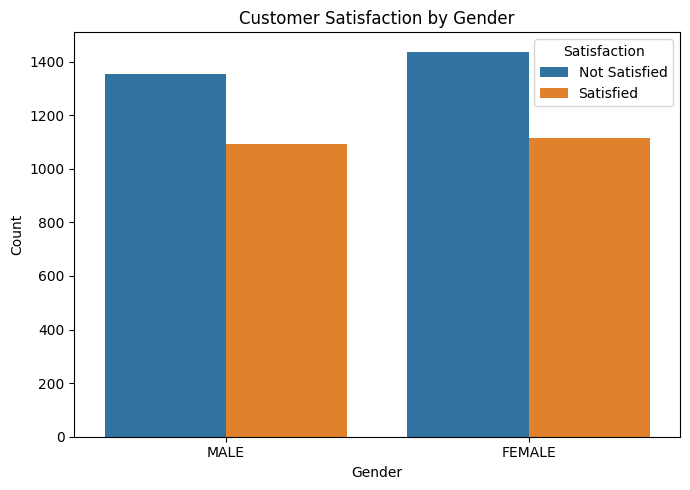

In [ ]:
# 6. Gender vs Satisfaction (Count Plot)
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Gender', hue='Experience')
plt.title("Customer Satisfaction by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Satisfaction")
plt.tight_layout()
plt.show()

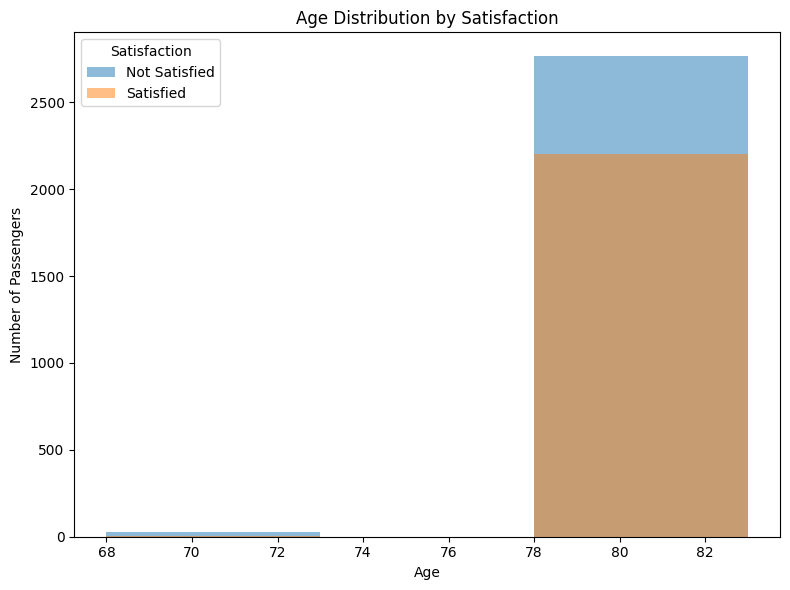

In [ ]:
# 7. Age Distribution by Satisfaction (Histogram)
plt.figure(figsize=(8, 6))
bins = range(int(df_clean['Age'].min()), int(df_clean['Age'].max()) + 5, 5)
for label in df_clean['Experience'].unique():
    subset = df_clean[df_clean['Experience'] == label]
    plt.hist(subset['Age'], bins=bins, alpha=0.5, label=label)

plt.title("Age Distribution by Satisfaction")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.legend(title="Satisfaction")
plt.tight_layout()
plt.show()


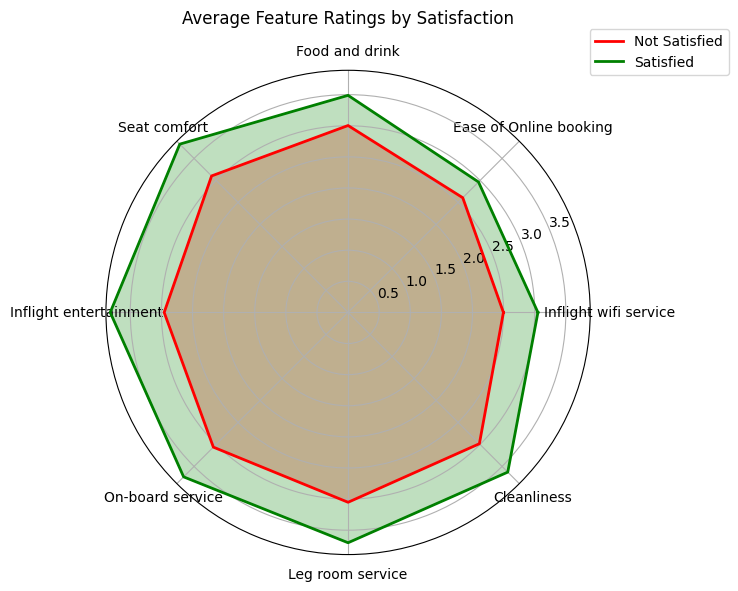

In [ ]:
# 8. Radar Chart - Feature Ratings by Satisfaction
features = [
    'Inflight wifi service', 'Ease of Online booking', 'Food and drink',
    'Seat comfort', 'Inflight entertainment', 'On-board service',
    'Leg room service', 'Cleanliness'
]

colors = {
    'Satisfied': 'green',
    'Not Satisfied': 'red'
}

mean_scores = df_clean.groupby('Experience')[features].mean()
categories = list(mean_scores.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for index, row in mean_scores.iterrows():
    values = row.tolist() + [row.tolist()[0]]
    ax.plot(angles, values, label=index, color=colors[index], linewidth=2)
    ax.fill(angles, values, alpha=0.25, color=colors[index])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=10)
ax.set_title("Average Feature Ratings by Satisfaction", y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

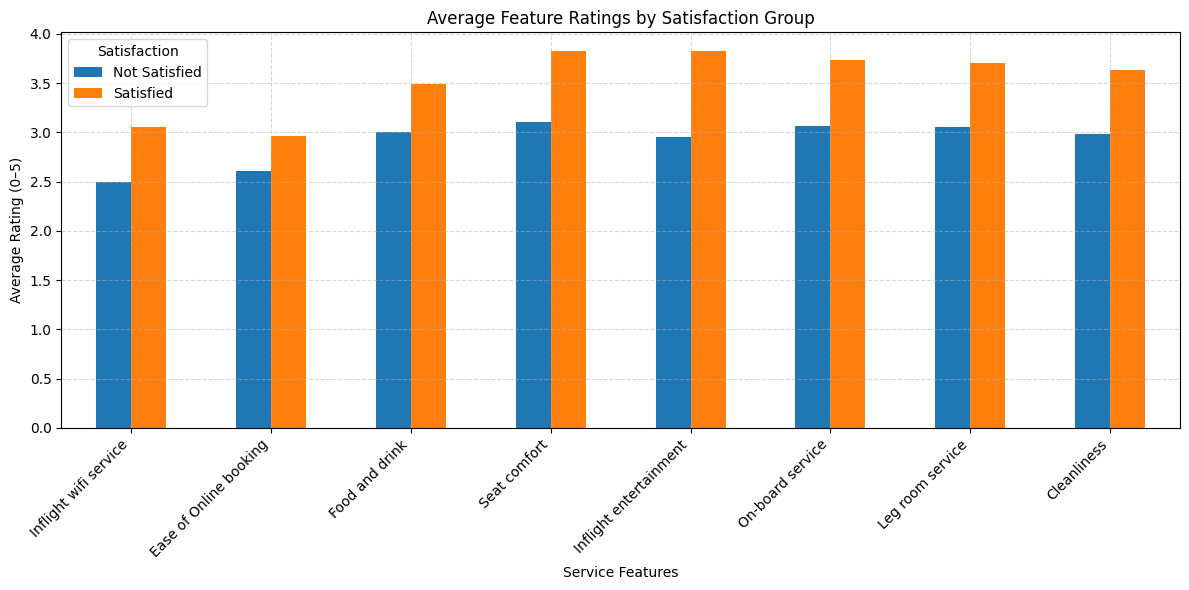

In [ ]:
mean_scores.T.plot(kind='bar', figsize=(12, 6))
plt.title("Average Feature Ratings by Satisfaction Group")
plt.ylabel("Average Rating (0–5)")
plt.xlabel("Service Features")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Satisfaction")
plt.tight_layout()
plt.show()

**DATA PREPARATION**

In [ ]:
#connverting gender to a ecoded value - MALE - 0 , FEMALE - 1

df_clean['Gender_encoded'] = df_clean['Gender'].map({'MALE': 0, 'FEMALE': 1})

In [ ]:
df_clean.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'InflightWifiService', 'ArrivalDelay',
       'Frequent Flyer Miles', 'Travel Purpose Detail', 'Experience',
       'Gender_encoded'],
      dtype='object')

In [ ]:
df_clean.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,249


In [ ]:
#2. Departure_Delay_Category
#Groups delay time into:'Short' (0–15 minutes) 'Medium' (16–60 minutes)'Long' (over 60 minutes)
#Useful for converting a wide numerical range into clear categories.

df_clean['Departure_Delay_Category'] = pd.cut(
    df_clean['Departure Delay in Minutes'],
    bins=[-1, 15, 60, float('inf')],
    labels=['Short', 'Medium', 'Long']
)


In [ ]:
#start with filling missing values - median for numerical column and mode for categorical column

df_clean['Ease of Online booking'] = df_clean['Ease of Online booking'].fillna(df_clean['Ease of Online booking'].median())


In [ ]:
df_clean['Cleanliness'] = df_clean['Cleanliness'].fillna(df_clean['Cleanliness'].median())

In [ ]:
df_clean['Leg room service'] = df_clean['Leg room service'].fillna(df_clean['Leg room service'].median())
df_clean['Baggage handling'] = df_clean['Baggage handling'].fillna(df_clean['Baggage handling'].median())

In [ ]:
# 1. Handle missing numeric columns using median
df_clean['Arrival Delay in Minutes'] = df_clean['Arrival Delay in Minutes'].fillna(
    df_clean['Arrival Delay in Minutes'].median())

df_clean['Frequent Flyer Miles'] = df_clean['Frequent Flyer Miles'].fillna(
    df_clean['Frequent Flyer Miles'].median())

# 2. Handle missing categorical columns using mode
df_clean['Travel Purpose Detail'] = df_clean['Travel Purpose Detail'].fillna(
    df_clean['Travel Purpose Detail'].mode()[0])

In [ ]:
df_clean.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [ ]:
#normalize numerical columns - These columns have wide range of values hence need
#to normalize them for algorithms to not be distorted. The values range between 0-1 for these columns
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
cols_to_normalize = [
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes',
    'ArrivalDelay',
    'Frequent Flyer Miles'
]

scaler = MinMaxScaler()
df_clean[cols_to_normalize] = scaler.fit_transform(df_clean[cols_to_normalize])

# Preview result
df_clean[cols_to_normalize].head()

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,ArrivalDelay,Frequent Flyer Miles
0,0.011431,0.012115,0.031250,0.027451,0.315878
1,0.005431,0.000000,0.009766,0.011765,0.017029
2,0.031334,0.000000,0.000000,0.001961,0.763362
3,0.013522,0.005553,0.015625,0.011765,0.894907
4,0.005702,0.000000,0.000000,0.000000,0.225613


In [ ]:
df_clean.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


In [ ]:
df_clean

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,InflightWifiService,ArrivalDelay,Frequent Flyer Miles,Travel Purpose Detail,Experience,Gender_encoded,Departure_Delay_Category
0,170172,MALE,Loyal Customer,82,Personal Travel,Eco Plus,0.011431,3,4,3.0,...,0.012115,0.031250,neutral or dissatisfied,0,0.027451,0.315878,Leisure,Not Satisfied,0,Medium
1,105047,MALE,disloyal Customer,79,Business travel,Business,0.005431,3,2,3.0,...,0.000000,0.009766,neutral or dissatisfied,1,0.011765,0.017029,Conference,Not Satisfied,0,Short
2,210028,FEMALE,Loyal Customer,80,Business travel,Business,0.031334,2,2,2.0,...,0.000000,0.000000,satisfied,5,0.001961,0.763362,Leisure,Satisfied,1,Short
3,124026,FEMALE,Loyal Customer,79,Business travel,Business,0.013522,2,5,5.0,...,0.005553,0.015625,satisfied,0,0.011765,0.894907,Leisure,Satisfied,1,Short
4,219299,MALE,Loyal Customer,79,Business travel,Business,0.005702,3,3,3.0,...,0.000000,0.000000,satisfied,5,0.000000,0.225613,Family Visit,Satisfied,0,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,224878,MALE,Loyal Customer,81,Personal Travel,Business,0.020419,1,1,1.0,...,0.000505,0.000000,neutral or dissatisfied,2,0.000000,0.601621,Work Trip,Not Satisfied,0,Short
4995,188948,FEMALE,Loyal Customer,78,Business travel,Business,0.037253,2,2,2.0,...,0.000000,0.000000,neutral or dissatisfied,2,0.003922,0.187094,Family Visit,Not Satisfied,1,Short
4996,202542,FEMALE,Loyal Customer,80,Personal Travel,Eco,0.059627,1,4,1.0,...,0.017668,0.060547,neutral or dissatisfied,2,0.066667,0.733407,Work Trip,Not Satisfied,1,Medium
4997,131577,FEMALE,disloyal Customer,81,Business travel,Eco,0.162399,2,5,2.0,...,0.000000,0.000000,neutral or dissatisfied,3,0.000000,0.791796,Family Visit,Not Satisfied,1,Short


**Feature Engineering**

In [ ]:
#here creating new columns based on the data set
#1.Sum of all customer-rated service features (e.g., Wi-Fi, seat comfort, food).
#Ranges vary depending on how many components were scored.
#Helps the model understand overall customer experience.

service_cols = [
    'Inflight wifi service',
    'Seat comfort',
    'Food and drink',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Cleanliness'
]
df_clean['Service_Total'] = df_clean[service_cols].sum(axis=1)

In [ ]:
df_Modified = df_clean.drop(columns=["satisfaction", "id", "Gender", 'Inflight wifi service',
    'Seat comfort',
    'Food and drink',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Cleanliness', 'InflightWifiService', 'ArrivalDelay', "Encoded_Experience"])



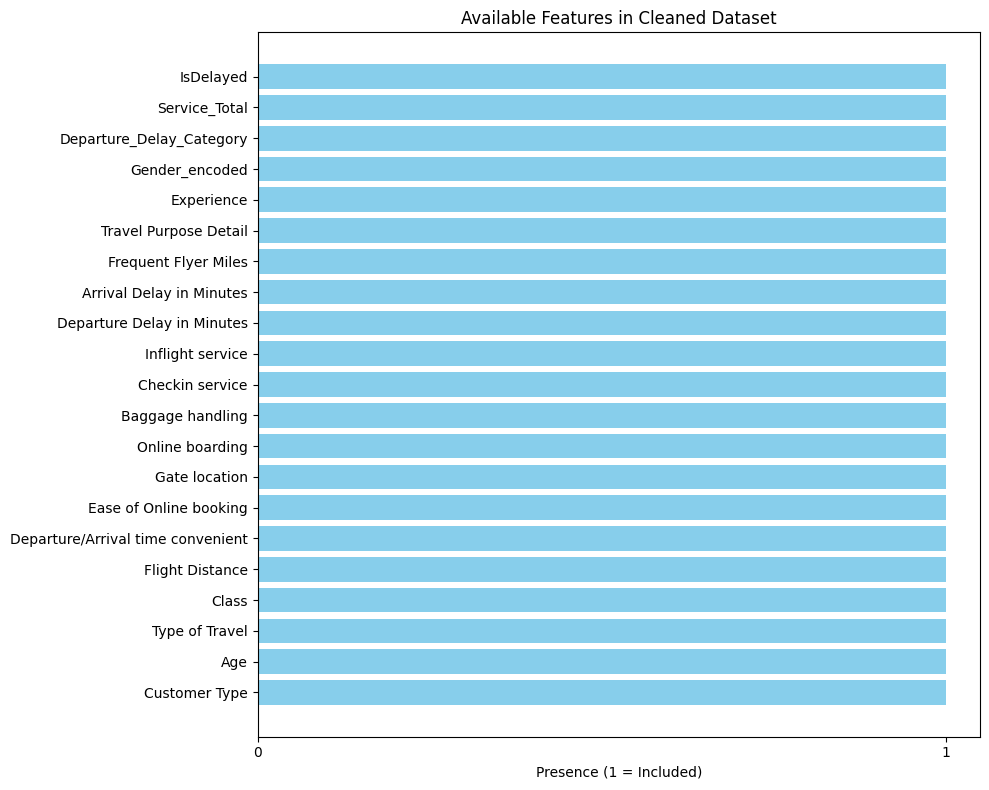

In [ ]:
# Get the list of column names
columns = df_Modified.columns.tolist()

# Create dummy counts (all 1s) just to plot the column names
counts = [1] * len(columns)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(columns, counts, color='skyblue')
plt.title("Available Features in Cleaned Dataset")
plt.xlabel("Presence (1 = Included)")
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   id                                 4999 non-null   int64   
 1   Gender                             4999 non-null   object  
 2   Customer Type                      4999 non-null   object  
 3   Age                                4999 non-null   int64   
 4   Type of Travel                     4999 non-null   object  
 5   Class                              4999 non-null   object  
 6   Flight Distance                    4999 non-null   float64 
 7   Inflight wifi service              4999 non-null   int64   
 8   Departure/Arrival time convenient  4999 non-null   int64   
 9   Ease of Online booking             4999 non-null   float64 
 10  Gate location                      4999 non-null   int64   
 11  Food and drink                     4999 non

In [ ]:
#3.create a simple flag to decide if the flight is delayed or not
df_clean['IsDelayed'] = df_clean['Departure Delay in Minutes'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df_clean.to_csv("prepared_air_travel_dataset.csv", index=False)

**DATA MODELING**

In [ ]:
# The idea is to use 6 different models and check which one suits better for the dataset

#1. Logistic Regression

#this needs more cleanup -

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df_clean['Encoded_Experience'] = label_encoder.fit_transform(df_clean['Experience']) #1-Satisfied, 0 - Not Satisfied

df_clean['Customer Type'] = label_encoder.fit_transform(df_clean['Customer Type'])

df_clean['Type of Travel'] = label_encoder.fit_transform(df_clean['Type of Travel'])

df_clean['Class'] = label_encoder.fit_transform(df_clean['Class'])

df_clean['Travel Purpose Detail'] = label_encoder.fit_transform(df_clean['Travel Purpose Detail'])

df_clean['Departure_Delay_Category'] = label_encoder.fit_transform(df_clean['Departure_Delay_Category'])

#model training
X = df_clean.drop(columns = ['Experience', 'Encoded_Experience', "satisfaction", "id", "Gender", 'Inflight wifi service',
    'Seat comfort',
    'Food and drink',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Cleanliness', 'InflightWifiService', 'ArrivalDelay'], axis=1)
y = df_clean['Encoded_Experience']

#normalize the numeric columns
numeric_cols = X.select_dtypes(include='number').columns
df_clean[numeric_cols].describe()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Check for NaNs in X_train before training
print("Checking for NaNs in X_train before training:")
print(X_train.isnull().sum().sort_values(ascending=False).head())


Checking for NaNs in X_train before training:
Customer Type      0
Age                0
Type of Travel     0
Class              0
Flight Distance    0
dtype: int64


In [ ]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer Type                      4999 non-null   int64  
 1   Age                                4999 non-null   int64  
 2   Type of Travel                     4999 non-null   int64  
 3   Class                              4999 non-null   int64  
 4   Flight Distance                    4999 non-null   float64
 5   Departure/Arrival time convenient  4999 non-null   int64  
 6   Ease of Online booking             4999 non-null   float64
 7   Gate location                      4999 non-null   int64  
 8   Online boarding                    4999 non-null   int64  
 9   Baggage handling                   4999 non-null   float64
 10  Checkin service                    4999 non-null   int64  
 11  Inflight service                   4999 non-null   int64

In [ ]:
from sklearn.linear_model import LogisticRegression

# Step 1: Initialize and Train the Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred = logreg.predict(X_test)

# Step 3: Evaluate the Model
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Satisfied', 'Satisfied']))
print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")

🔍 Confusion Matrix:
[[687 111]
 [210 492]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.77      0.86      0.81       798
    Satisfied       0.82      0.70      0.75       702

     accuracy                           0.79      1500
    macro avg       0.79      0.78      0.78      1500
 weighted avg       0.79      0.79      0.78      1500


✅ Accuracy Score: 0.7860


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall, the model is 79% accurate. - With more inclination to detect if the customer is dissatisfied.


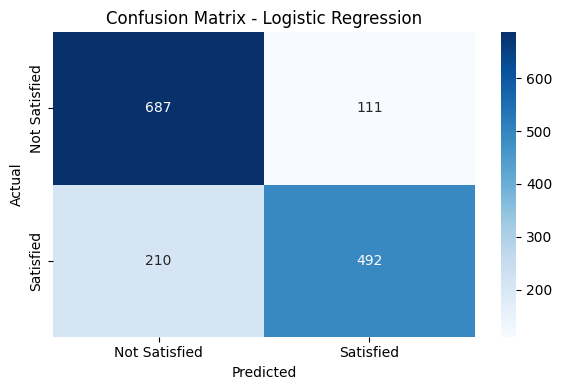

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Satisfied', 'Satisfied']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

In [ ]:
#2. KNN algorithm

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# You can start with k=11 (default) or experiment
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred_knn = knn.predict(X_test)

# Evaluation
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['Not Satisfied', 'Satisfied']))

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_knn):.4f}")

🔍 Confusion Matrix:
[[687 111]
 [251 451]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.73      0.86      0.79       798
    Satisfied       0.80      0.64      0.71       702

     accuracy                           0.76      1500
    macro avg       0.77      0.75      0.75      1500
 weighted avg       0.77      0.76      0.76      1500


✅ Accuracy Score: 0.7587


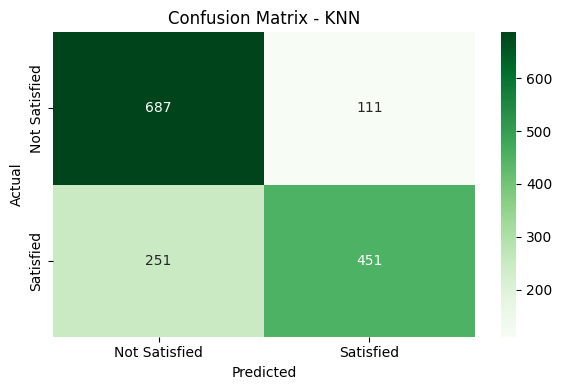

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
labels = ['Not Satisfied', 'Satisfied']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [ ]:
#3. Use the decision tree model

from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dtree.predict(X_test)

# Evaluation
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Not Satisfied', 'Satisfied']))

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_dt):.4f}")


🔍 Confusion Matrix:
[[621 177]
 [209 493]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.75      0.78      0.76       798
    Satisfied       0.74      0.70      0.72       702

     accuracy                           0.74      1500
    macro avg       0.74      0.74      0.74      1500
 weighted avg       0.74      0.74      0.74      1500


✅ Accuracy Score: 0.7427


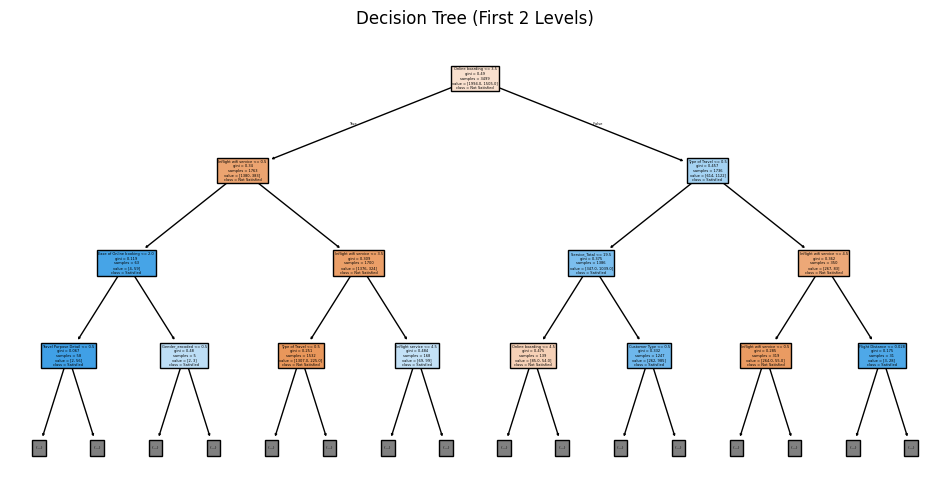

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(dtree, max_depth=3, feature_names=X.columns, class_names=['Not Satisfied', 'Satisfied'], filled=True)
plt.title("Decision Tree (First 2 Levels)")
plt.show()

In [ ]:
#4. Random Forest Classifier

# Train Random Forest Model
clf = RandomForestClassifier(n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# Evaluate Model
y_pred = clf.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(conf_matrix)

Predicted    0    1
Actual             
0          710   88
1          181  521


In [ ]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Individual metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

Confusion Matrix:
 [[710  88]
 [181 521]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       798
           1       0.86      0.74      0.79       702

    accuracy                           0.82      1500
   macro avg       0.83      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500

Accuracy: 0.82
Precision: 0.86
Recall: 0.74
F1-Score: 0.79


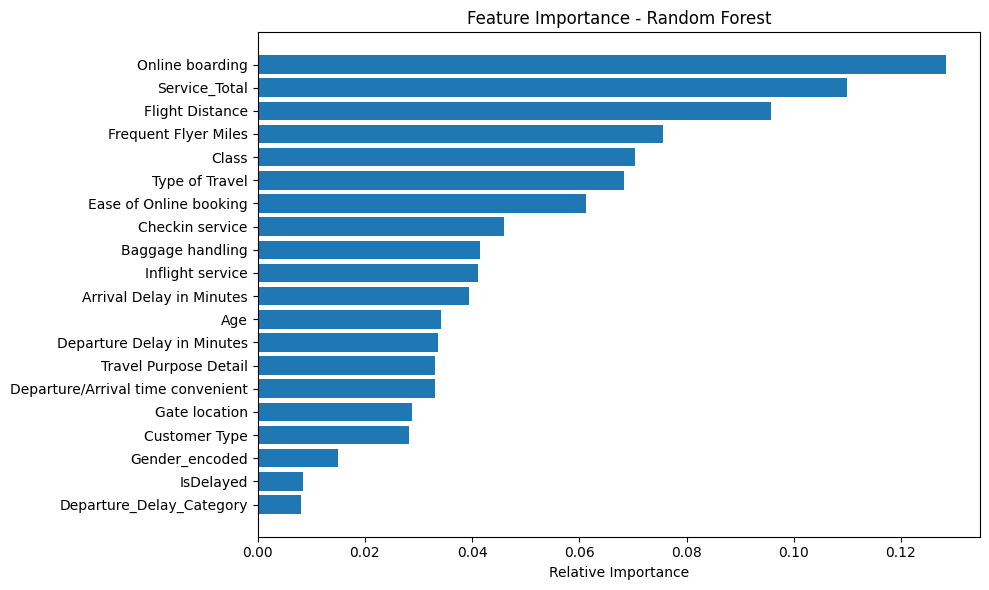

In [ ]:
# Get feature importances
importances = clf.feature_importances_
features = X.columns

# Combine into DataFrame
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [ ]:
#Inspect using AUTO AI

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# LazyPredict model benchmarking
autoAI = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = autoAI.fit(X_train, X_test, y_train, y_test)

# Show model performance
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1505, number of negative: 1994
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 3499, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.430123 -> initscore=-0.281350
[LightGBM] [Info] Start training from score -0.281350
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.83               0.82     0.82      0.83   
RandomForestClassifier             0.82               0.82     0.82      0.82   
ExtraTreesClassifier               0.82               0.81     0.81      0.82   
XGBClassifier                      0.81  